# Victims of terror data










#Introduction

The world is changing all the time and every day we have to make decisions and take some responsibilities. 
Should we remember about the past to learn the lessons of history, to understand people and their inheritance better, to explain actions of politicians and sometimes the whole nation or just to remember people, citizens, victims?

Memorial is an international human rights organisation. Founded in Russia, it existed in 1989-2021 and was the country's oldest human rights group. One of its main purposes was the recording of the crimes against humanity committed in the Soviet Union, particularly during the Stalinist era.

As a student of Digital Science and Russian speaker, I was interested in working on a project which had a practical application, where I could apply my knowledge.  That's why I chose the project based on the information provided by Memorial about victims of political repression in the 30-s in Moscow.

I wanted to explore the information and visualise it. 

# Dataset description

1. Datast source: https://github.com/nextgis/memorial_data 
Mentioned that dataset was scraped from source: http://mos.memo.ru

Related links:

Lubyanka Web-GIS sources: https://github.com/nextgis/memo-oct29


2. The data contains 3 files with information about addresses of victims, geolocation and personal data of victims. 

All the datasets are in Russian language.

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
adr = pd.read_csv("addresses.csv")
adr

,ADDRESS_ID,ADDRESS,APT_COUNT,PERS_COUNT,LINK
0,1,"Авиамоторная ул., д.1",1,1,http://mos.memo.ru/shot-1.htm#s1
1,2,"Авиамоторная ул., д.4",6,8,http://mos.memo.ru/shot-1.htm#s1
2,3,"Авиамоторная ул., д.4а",1,1,http://mos.memo.ru/shot-1.htm#s1
3,4,"Авиамоторная ул., д.20",1,1,http://mos.memo.ru/shot-1.htm#s1
4,5,"Авиамоторная ул., д.21",1,1,http://mos.memo.ru/shot-1.htm#s1
...,...,...,...,...,...
5276,5277,"Яузская ул., д.6",1,1,http://mos.memo.ru/shot-78.htm#s14
5277,5278,"Яузский б-р, д.4",1,1,http://mos.memo.ru/shot-78.htm#s15
5278,5279,"Яузский б-р, д.6",1,1,http://mos.memo.ru/shot-78.htm#s15
5279,5280,"Яузский б-р, д.13",2,2,http://mos.memo.ru/shot-78.htm#s15


In [ ]:
adr.columns

Index(['ADDRESS_ID', 'ADDRESS', 'APT_COUNT', 'PERS_COUNT', 'LINK'], dtype='object')

In [ ]:
adr['ADDRESS'].nunique()

5279

In [ ]:
dupladr = adr[adr.duplicated(['ADDRESS'])]
print(dupladr, sep='\n')

      ADDRESS_ID  ...                                LINK
1804        1805  ...  http://mos.memo.ru/shot-25.htm#s37
1862        1863  ...  http://mos.memo.ru/shot-26.htm#s17

[2 rows x 5 columns]


In [ ]:
adr.isna().sum()

ADDRESS_ID    0
ADDRESS       0
APT_COUNT     0
PERS_COUNT    0
LINK          0
dtype: int64

In [ ]:
adr2 = pd.read_csv("addresses2.csv")
adr2

,street,house,repressed,longitude,latitude,distance from Kremlin
0,Авиамоторная ул.,д.1,1,37.707961,55.763564,5.830318
1,Авиамоторная ул.,д.4,8,37.713530,55.758554,6.079530
2,Авиамоторная ул.,д.4а,1,37.713530,55.758554,6.079530
3,Авиамоторная ул.,д.20,1,37.717717,55.749684,6.303824
4,Авиамоторная ул.,д.21,1,37.717474,55.759365,6.335556
...,...,...,...,...,...,...
5458,Яузская ул.,д.4,1,37.647540,55.745458,2.041361
5459,Яузская ул.,д.6,1,37.646291,55.747540,1.895068
5460,Яузский б-р,д.4,1,37.644953,55.751386,1.746309
5461,Яузский б-р,д.6,1,37.644953,55.751386,1.746309


In [ ]:
adr2['ADDRESS'] = adr2['street']+', '+adr2['house']
adr2

,street,house,repressed,longitude,latitude,distance from Kremlin,ADDRESS
0,Авиамоторная ул.,д.1,1,37.707961,55.763564,5.830318,"Авиамоторная ул., д.1"
1,Авиамоторная ул.,д.4,8,37.713530,55.758554,6.079530,"Авиамоторная ул., д.4"
2,Авиамоторная ул.,д.4а,1,37.713530,55.758554,6.079530,"Авиамоторная ул., д.4а"
3,Авиамоторная ул.,д.20,1,37.717717,55.749684,6.303824,"Авиамоторная ул., д.20"
4,Авиамоторная ул.,д.21,1,37.717474,55.759365,6.335556,"Авиамоторная ул., д.21"
...,...,...,...,...,...,...,...
5458,Яузская ул.,д.4,1,37.647540,55.745458,2.041361,"Яузская ул., д.4"
5459,Яузская ул.,д.6,1,37.646291,55.747540,1.895068,"Яузская ул., д.6"
5460,Яузский б-р,д.4,1,37.644953,55.751386,1.746309,"Яузский б-р, д.4"
5461,Яузский б-р,д.6,1,37.644953,55.751386,1.746309,"Яузский б-р, д.6"


In [ ]:
adr2.columns

Index(['street', 'house', 'repressed', 'longitude', 'latitude',
       'distance from Kremlin', 'ADDRESS'],
      dtype='object')

In [ ]:
adr2['ADDRESS'].nunique()

5266

In [ ]:
dupladr2= adr2[adr2.duplicated(['ADDRESS'])]
print(dupladr2, sep='\n')

                         street  ...                         ADDRESS
1800         Красная Горка  ул.  ...        Красная Горка  ул., д.35
1858  Краснокурсантский 1-й пр.  ...  Краснокурсантский 1-й пр., д.5
3132           Оболенский  пер.  ...           Оболенский  пер., д.9
3133           Оболенский  пер.  ...          Оболенский  пер., д.9а
3134             Образцова  ул.  ...            Образцова  ул., д.12
...                         ...  ...                             ...
3322        Островский 1-й пер.  ...        Островский 1-й пер., д.8
3323        Островский 2-й пер.  ...        Островский 2-й пер., д.7
3324       Остроумовская Б. ул.  ...       Остроумовская Б. ул., д.4
3325       Остроумовская Б. ул.  ...      Остроумовская Б. ул., д.12
3326       Остроумовская Б. ул.  ...      Остроумовская Б. ул., д.15

[197 rows x 7 columns]


In [ ]:
adr2.isna().sum()

street                     0
house                      0
repressed                  0
longitude                694
latitude                 694
distance from Kremlin    694
ADDRESS                    0
dtype: int64

In [ ]:
per = pd.read_csv("persons.csv")
per 

,ADDRESS_ID,APT,NAME,BIO,LINK
0,1,1,Крон Арнольд Фрицевич,"род. 1884, Лифляндская губ. (Пальцамская волос...",http://mos.memo.ru/shot-1.htm#s1
1,2,2,Кузьмин Василий Иванович,"род. 1904, Самарская губ., Бузулукский уезд, д...",http://mos.memo.ru/shot-1.htm#s1
2,2,19,Чернышев Илья Константинович,"род. 1907, г. Харбина (Северный Китай), русски...",http://mos.memo.ru/shot-1.htm#s1
3,2,19,Колесникова Ксения Васильевна,"род. 1899, Пензенская губ., Саранский уезд, д....",http://mos.memo.ru/shot-1.htm#s1
4,2,19,Колесников Иван Михайлович,"род. 1895, Воронежская обл., Новохоперский р-н...",http://mos.memo.ru/shot-1.htm#s1
...,...,...,...,...,...
11784,5278,,Бунтов Ануфрий Иванович,"род. 1905, Австрия, Галиции, австриец, б/п, ст...",http://mos.memo.ru/shot-78.htm#s15
11785,5279,1,Цзю Петр Иннокентьевич,"род. 1893, Приморская обл. Дальневосточный кр....",http://mos.memo.ru/shot-78.htm#s15
11786,5280,19,Янкунас Марциан Викентьевич,"род. 1890, Ковенская губ., дер. Меловид, литов...",http://mos.memo.ru/shot-78.htm#s15
11787,5280,26,Поздеев Борис Иванович,"род. 1887, г. Москва, русский, б/п, член Моско...",http://mos.memo.ru/shot-78.htm#s15


In [ ]:
per.loc[1,'BIO']

'род. 1904, Самарская губ., Бузулукский уезд, д. Маложданово, русский, б/п, академия коммунального хозяйства: механик по приборам. Адрес: Авиамоторная ул., д.4, корп. 2, кв. 2. Рассстрелян 10.08.1938. Место захоронения: Бутово.'

#Structure of the dataset



1.   The 1st dataset with addresses consists of:


-    5 columns: 'ADDRESS_ID', 'ADDRESS', 'APT_COUNT', 'PERS_COUNT', 'LINK'
- 5279 unique values
- 0 null values
- 2 duplicates


2.   The 2nd dataset with addresses consists of:

-    7 columns(6 columns: 'street', 'house', 'repressed', 'longitude', 'latitude',
       'distance from Kremlin' + 1 added column 'ADDRESS' ('street' + 'house' columns)
- 5266 unique values
- 694 null values
- 197 duplicates

3. Dataset with personal information:
- 11789 values


#Preprocessing

###Replacing extra spaces between words and checking

In [ ]:
print(adr.iloc[0]['ADDRESS'])
print(adr2.iloc[0]['ADDRESS'])
if (adr.iloc[0]['ADDRESS'].replace("  "," ") == adr2.iloc[0]['ADDRESS'].replace("  "," ")):
    print('1')
else:
    print('2')

Авиамоторная ул., д.1
Авиамоторная  ул., д.1
1


###Mergind two datasets with addresses on the text column ADDRESS

In [ ]:
adr['ADDRESS'] = adr['ADDRESS'].str.strip().replace('\s+', ' ', regex=True)
adr2['ADDRESS']= adr2['ADDRESS'].str.strip().replace('\s+', ' ', regex=True)
alladr = pd.merge(adr, adr2, how = 'inner', on = 'ADDRESS')
alladr

,ADDRESS_ID,ADDRESS,APT_COUNT,PERS_COUNT,LINK,street,house,repressed,longitude,latitude,distance from Kremlin
0,1,"Авиамоторная ул., д.1",1,1,http://mos.memo.ru/shot-1.htm#s1,Авиамоторная ул.,д.1,1,37.707961,55.763564,5.830318
1,2,"Авиамоторная ул., д.4",6,8,http://mos.memo.ru/shot-1.htm#s1,Авиамоторная ул.,д.4,8,37.713530,55.758554,6.079530
2,3,"Авиамоторная ул., д.4а",1,1,http://mos.memo.ru/shot-1.htm#s1,Авиамоторная ул.,д.4а,1,37.713530,55.758554,6.079530
3,4,"Авиамоторная ул., д.20",1,1,http://mos.memo.ru/shot-1.htm#s1,Авиамоторная ул.,д.20,1,37.717717,55.749684,6.303824
4,5,"Авиамоторная ул., д.21",1,1,http://mos.memo.ru/shot-1.htm#s1,Авиамоторная ул.,д.21,1,37.717474,55.759365,6.335556
...,...,...,...,...,...,...,...,...,...,...,...
5455,5276,"Яузская ул., д.4",1,1,http://mos.memo.ru/shot-78.htm#s14,Яузская ул.,д.4,1,37.647540,55.745458,2.041361
5456,5277,"Яузская ул., д.6",1,1,http://mos.memo.ru/shot-78.htm#s14,Яузская ул.,д.6,1,37.646291,55.747540,1.895068
5457,5278,"Яузский б-р, д.4",1,1,http://mos.memo.ru/shot-78.htm#s15,Яузский б-р,д.4,1,37.644953,55.751386,1.746309
5458,5279,"Яузский б-р, д.6",1,1,http://mos.memo.ru/shot-78.htm#s15,Яузский б-р,д.6,1,37.644953,55.751386,1.746309


In [ ]:
k = 0
for i in range(len(alladr)):
  if (alladr.PERS_COUNT[i]==alladr.repressed[i]):
    k= k+0
  else:
    k = k+1
    print(alladr.iloc[i])
print(k)

ADDRESS_ID                                             1861
ADDRESS                      Краснокурсантский 1-й пр., д.5
APT_COUNT                                                 1
PERS_COUNT                                                1
LINK                     http://mos.memo.ru/shot-26.htm#s17
street                            Краснокурсантский 1-й пр.
house                                                   д.5
repressed                                                 2
longitude                                           37.6977
latitude                                            55.7631
distance from Kremlin                               5.19593
Name: 1855, dtype: object
ADDRESS_ID                                             1863
ADDRESS                      Краснокурсантский 1-й пр., д.5
APT_COUNT                                                 2
PERS_COUNT                                                2
LINK                     http://mos.memo.ru/shot-26.htm#s17
street        

In [ ]:
alladr = alladr.drop(columns = ['street','house','repressed'])
alladr

,ADDRESS_ID,ADDRESS,APT_COUNT,PERS_COUNT,LINK,longitude,latitude,distance from Kremlin
0,1,"Авиамоторная ул., д.1",1,1,http://mos.memo.ru/shot-1.htm#s1,37.707961,55.763564,5.830318
1,2,"Авиамоторная ул., д.4",6,8,http://mos.memo.ru/shot-1.htm#s1,37.713530,55.758554,6.079530
2,3,"Авиамоторная ул., д.4а",1,1,http://mos.memo.ru/shot-1.htm#s1,37.713530,55.758554,6.079530
3,4,"Авиамоторная ул., д.20",1,1,http://mos.memo.ru/shot-1.htm#s1,37.717717,55.749684,6.303824
4,5,"Авиамоторная ул., д.21",1,1,http://mos.memo.ru/shot-1.htm#s1,37.717474,55.759365,6.335556
...,...,...,...,...,...,...,...,...
5455,5276,"Яузская ул., д.4",1,1,http://mos.memo.ru/shot-78.htm#s14,37.647540,55.745458,2.041361
5456,5277,"Яузская ул., д.6",1,1,http://mos.memo.ru/shot-78.htm#s14,37.646291,55.747540,1.895068
5457,5278,"Яузский б-р, д.4",1,1,http://mos.memo.ru/shot-78.htm#s15,37.644953,55.751386,1.746309
5458,5279,"Яузский б-р, д.6",1,1,http://mos.memo.ru/shot-78.htm#s15,37.644953,55.751386,1.746309


In [ ]:
#missing values
alladr.isna().sum()

ADDRESS_ID                 0
ADDRESS                    0
APT_COUNT                  0
PERS_COUNT                 0
LINK                       0
longitude                689
latitude                 689
distance from Kremlin    689
dtype: int64

In [ ]:
#duplicates
dupladrall= alladr[alladr.duplicated(['ADDRESS'])]
print(dupladrall, sep='\n')

      ADDRESS_ID  ... distance from Kremlin
1793        1801  ...                   NaN
1794        1805  ...                   NaN
1795        1805  ...                   NaN
1855        1861  ...              5.195934
1856        1863  ...              5.195934
...          ...  ...                   ...
3318        3136  ...                   NaN
3320        3137  ...                   NaN
3322        3138  ...              6.657309
3324        3139  ...              6.659892
3326        3140  ...              6.477354

[201 rows x 8 columns]


In [ ]:
adkrem = alladr.copy()
adkrem

,ADDRESS_ID,ADDRESS,APT_COUNT,PERS_COUNT,LINK,longitude,latitude,distance from Kremlin
0,1,"Авиамоторная ул., д.1",1,1,http://mos.memo.ru/shot-1.htm#s1,37.707961,55.763564,5.830318
1,2,"Авиамоторная ул., д.4",6,8,http://mos.memo.ru/shot-1.htm#s1,37.713530,55.758554,6.079530
2,3,"Авиамоторная ул., д.4а",1,1,http://mos.memo.ru/shot-1.htm#s1,37.713530,55.758554,6.079530
3,4,"Авиамоторная ул., д.20",1,1,http://mos.memo.ru/shot-1.htm#s1,37.717717,55.749684,6.303824
4,5,"Авиамоторная ул., д.21",1,1,http://mos.memo.ru/shot-1.htm#s1,37.717474,55.759365,6.335556
...,...,...,...,...,...,...,...,...
5455,5276,"Яузская ул., д.4",1,1,http://mos.memo.ru/shot-78.htm#s14,37.647540,55.745458,2.041361
5456,5277,"Яузская ул., д.6",1,1,http://mos.memo.ru/shot-78.htm#s14,37.646291,55.747540,1.895068
5457,5278,"Яузский б-р, д.4",1,1,http://mos.memo.ru/shot-78.htm#s15,37.644953,55.751386,1.746309
5458,5279,"Яузский б-р, д.6",1,1,http://mos.memo.ru/shot-78.htm#s15,37.644953,55.751386,1.746309


In [ ]:
adkrem.dtypes

ADDRESS_ID                 int64
ADDRESS                   object
APT_COUNT                  int64
PERS_COUNT                 int64
LINK                      object
longitude                float64
latitude                 float64
distance from Kremlin    float64
dtype: object

###Adding coordinates of Kremlin

In [ ]:
adkrem['long_kr']= float(37.617664)
adkrem['lat_kr']=float(55.752121)
adkrem

,ADDRESS_ID,ADDRESS,APT_COUNT,PERS_COUNT,LINK,longitude,latitude,distance from Kremlin,long_kr,lat_kr
0,1,"Авиамоторная ул., д.1",1,1,http://mos.memo.ru/shot-1.htm#s1,37.707961,55.763564,5.830318,37.617664,55.752121
1,2,"Авиамоторная ул., д.4",6,8,http://mos.memo.ru/shot-1.htm#s1,37.713530,55.758554,6.079530,37.617664,55.752121
2,3,"Авиамоторная ул., д.4а",1,1,http://mos.memo.ru/shot-1.htm#s1,37.713530,55.758554,6.079530,37.617664,55.752121
3,4,"Авиамоторная ул., д.20",1,1,http://mos.memo.ru/shot-1.htm#s1,37.717717,55.749684,6.303824,37.617664,55.752121
4,5,"Авиамоторная ул., д.21",1,1,http://mos.memo.ru/shot-1.htm#s1,37.717474,55.759365,6.335556,37.617664,55.752121
...,...,...,...,...,...,...,...,...,...,...
5455,5276,"Яузская ул., д.4",1,1,http://mos.memo.ru/shot-78.htm#s14,37.647540,55.745458,2.041361,37.617664,55.752121
5456,5277,"Яузская ул., д.6",1,1,http://mos.memo.ru/shot-78.htm#s14,37.646291,55.747540,1.895068,37.617664,55.752121
5457,5278,"Яузский б-р, д.4",1,1,http://mos.memo.ru/shot-78.htm#s15,37.644953,55.751386,1.746309,37.617664,55.752121
5458,5279,"Яузский б-р, д.6",1,1,http://mos.memo.ru/shot-78.htm#s15,37.644953,55.751386,1.746309,37.617664,55.752121


In [ ]:
per1 = per.copy()
per1

,ADDRESS_ID,APT,NAME,BIO,LINK
0,1,1,Крон Арнольд Фрицевич,"род. 1884, Лифляндская губ. (Пальцамская волос...",http://mos.memo.ru/shot-1.htm#s1
1,2,2,Кузьмин Василий Иванович,"род. 1904, Самарская губ., Бузулукский уезд, д...",http://mos.memo.ru/shot-1.htm#s1
2,2,19,Чернышев Илья Константинович,"род. 1907, г. Харбина (Северный Китай), русски...",http://mos.memo.ru/shot-1.htm#s1
3,2,19,Колесникова Ксения Васильевна,"род. 1899, Пензенская губ., Саранский уезд, д....",http://mos.memo.ru/shot-1.htm#s1
4,2,19,Колесников Иван Михайлович,"род. 1895, Воронежская обл., Новохоперский р-н...",http://mos.memo.ru/shot-1.htm#s1
...,...,...,...,...,...
11784,5278,,Бунтов Ануфрий Иванович,"род. 1905, Австрия, Галиции, австриец, б/п, ст...",http://mos.memo.ru/shot-78.htm#s15
11785,5279,1,Цзю Петр Иннокентьевич,"род. 1893, Приморская обл. Дальневосточный кр....",http://mos.memo.ru/shot-78.htm#s15
11786,5280,19,Янкунас Марциан Викентьевич,"род. 1890, Ковенская губ., дер. Меловид, литов...",http://mos.memo.ru/shot-78.htm#s15
11787,5280,26,Поздеев Борис Иванович,"род. 1887, г. Москва, русский, б/п, член Моско...",http://mos.memo.ru/shot-78.htm#s15


In [ ]:
per1['BIO']= per1['BIO'].str.replace('род. ', '', regex=True)
per1

,ADDRESS_ID,APT,NAME,BIO,LINK
0,1,1,Крон Арнольд Фрицевич,"1884, Лифляндская губ. (Пальцамская волость), ...",http://mos.memo.ru/shot-1.htm#s1
1,2,2,Кузьмин Василий Иванович,"1904, Самарская губ., Бузулукский уезд, д. Мал...",http://mos.memo.ru/shot-1.htm#s1
2,2,19,Чернышев Илья Константинович,"1907, г. Харбина (Северный Китай), русский, чл...",http://mos.memo.ru/shot-1.htm#s1
3,2,19,Колесникова Ксения Васильевна,"1899, Пензенская губ., Саранский уезд, д. Зори...",http://mos.memo.ru/shot-1.htm#s1
4,2,19,Колесников Иван Михайлович,"1895, Воронежская обл., Новохоперский р-н, с. ...",http://mos.memo.ru/shot-1.htm#s1
...,...,...,...,...,...
11784,5278,,Бунтов Ануфрий Иванович,"1905, Австрия, Галиции, австриец, б/п, стройот...",http://mos.memo.ru/shot-78.htm#s15
11785,5279,1,Цзю Петр Иннокентьевич,"1893, Приморская обл. Дальневосточный кр., Пос...",http://mos.memo.ru/shot-78.htm#s15
11786,5280,19,Янкунас Марциан Викентьевич,"1890, Ковенская губ., дер. Меловид, литовец, б...",http://mos.memo.ru/shot-78.htm#s15
11787,5280,26,Поздеев Борис Иванович,"1887, г. Москва, русский, б/п, член Московской...",http://mos.memo.ru/shot-78.htm#s15


In [ ]:
per1['year_b'] = per1['BIO'].str.extract((r'(^[1][0-9]{3})'),expand = True)
per1

,ADDRESS_ID,APT,NAME,BIO,LINK,year_b
0,1,1,Крон Арнольд Фрицевич,"1884, Лифляндская губ. (Пальцамская волость), ...",http://mos.memo.ru/shot-1.htm#s1,1884
1,2,2,Кузьмин Василий Иванович,"1904, Самарская губ., Бузулукский уезд, д. Мал...",http://mos.memo.ru/shot-1.htm#s1,1904
2,2,19,Чернышев Илья Константинович,"1907, г. Харбина (Северный Китай), русский, чл...",http://mos.memo.ru/shot-1.htm#s1,1907
3,2,19,Колесникова Ксения Васильевна,"1899, Пензенская губ., Саранский уезд, д. Зори...",http://mos.memo.ru/shot-1.htm#s1,1899
4,2,19,Колесников Иван Михайлович,"1895, Воронежская обл., Новохоперский р-н, с. ...",http://mos.memo.ru/shot-1.htm#s1,1895
...,...,...,...,...,...,...
11784,5278,,Бунтов Ануфрий Иванович,"1905, Австрия, Галиции, австриец, б/п, стройот...",http://mos.memo.ru/shot-78.htm#s15,1905
11785,5279,1,Цзю Петр Иннокентьевич,"1893, Приморская обл. Дальневосточный кр., Пос...",http://mos.memo.ru/shot-78.htm#s15,1893
11786,5280,19,Янкунас Марциан Викентьевич,"1890, Ковенская губ., дер. Меловид, литовец, б...",http://mos.memo.ru/shot-78.htm#s15,1890
11787,5280,26,Поздеев Борис Иванович,"1887, г. Москва, русский, б/п, член Московской...",http://mos.memo.ru/shot-78.htm#s15,1887


In [ ]:
per1['year_b'] = per1['BIO'].str.extract((r'((^([0][1-9]|[12][0-9]|3[01])\.(0[1-9]|1[0-2])\.\d{4}))'),expand = True)
per1

,ADDRESS_ID,APT,NAME,BIO,LINK,year_b
0,1,1,Крон Арнольд Фрицевич,"1884, Лифляндская губ. (Пальцамская волость), ...",http://mos.memo.ru/shot-1.htm#s1,NaN
1,2,2,Кузьмин Василий Иванович,"1904, Самарская губ., Бузулукский уезд, д. Мал...",http://mos.memo.ru/shot-1.htm#s1,NaN
2,2,19,Чернышев Илья Константинович,"1907, г. Харбина (Северный Китай), русский, чл...",http://mos.memo.ru/shot-1.htm#s1,NaN
3,2,19,Колесникова Ксения Васильевна,"1899, Пензенская губ., Саранский уезд, д. Зори...",http://mos.memo.ru/shot-1.htm#s1,NaN
4,2,19,Колесников Иван Михайлович,"1895, Воронежская обл., Новохоперский р-н, с. ...",http://mos.memo.ru/shot-1.htm#s1,NaN
...,...,...,...,...,...,...
11784,5278,,Бунтов Ануфрий Иванович,"1905, Австрия, Галиции, австриец, б/п, стройот...",http://mos.memo.ru/shot-78.htm#s15,NaN
11785,5279,1,Цзю Петр Иннокентьевич,"1893, Приморская обл. Дальневосточный кр., Пос...",http://mos.memo.ru/shot-78.htm#s15,NaN
11786,5280,19,Янкунас Марциан Викентьевич,"1890, Ковенская губ., дер. Меловид, литовец, б...",http://mos.memo.ru/shot-78.htm#s15,NaN
11787,5280,26,Поздеев Борис Иванович,"1887, г. Москва, русский, б/п, член Московской...",http://mos.memo.ru/shot-78.htm#s15,NaN


In [ ]:
per1

,ADDRESS_ID,APT,NAME,BIO,LINK,year_b
0,1,1,Крон Арнольд Фрицевич,"1884, Лифляндская губ. (Пальцамская волость), ...",http://mos.memo.ru/shot-1.htm#s1,1884
1,2,2,Кузьмин Василий Иванович,"1904, Самарская губ., Бузулукский уезд, д. Мал...",http://mos.memo.ru/shot-1.htm#s1,1904
2,2,19,Чернышев Илья Константинович,"1907, г. Харбина (Северный Китай), русский, чл...",http://mos.memo.ru/shot-1.htm#s1,1907
3,2,19,Колесникова Ксения Васильевна,"1899, Пензенская губ., Саранский уезд, д. Зори...",http://mos.memo.ru/shot-1.htm#s1,1899
4,2,19,Колесников Иван Михайлович,"1895, Воронежская обл., Новохоперский р-н, с. ...",http://mos.memo.ru/shot-1.htm#s1,1895
...,...,...,...,...,...,...
11784,5278,,Бунтов Ануфрий Иванович,"1905, Австрия, Галиции, австриец, б/п, стройот...",http://mos.memo.ru/shot-78.htm#s15,1905
11785,5279,1,Цзю Петр Иннокентьевич,"1893, Приморская обл. Дальневосточный кр., Пос...",http://mos.memo.ru/shot-78.htm#s15,1893
11786,5280,19,Янкунас Марциан Викентьевич,"1890, Ковенская губ., дер. Меловид, литовец, б...",http://mos.memo.ru/shot-78.htm#s15,1890
11787,5280,26,Поздеев Борис Иванович,"1887, г. Москва, русский, б/п, член Московской...",http://mos.memo.ru/shot-78.htm#s15,1887


In [ ]:
per1[per1['year_b'].isnull()]

,ADDRESS_ID,APT,NAME,BIO,LINK,year_b
21,13,58,Колюбякин Федор Павлович,"1.01.1905, в д.Борщовка Козловского уезда Тамб...",http://mos.memo.ru/shot-1.htm#s3,NaN
32,18,34,Канашенкова Бронислава Флориановна,"25.08.1908, в мест.Граево Ломжинской губ., пол...",http://mos.memo.ru/shot-1.htm#s3,NaN
35,19,21,Боштедт Карл Карлович,"20.07.1898, в г.Киль (Германия), немец, кандид...",http://mos.memo.ru/shot-1.htm#s3,NaN
40,23,,Хотовицкий Александр Александрович,"11.02.1872 (по другим данным - 1870), в Кремен...",http://mos.memo.ru/shot-1.htm#s6,NaN
74,27,2,Анашкин Николай Максимович,"23.01.1906, в с.Напольное Алатырского уезда Си...",http://mos.memo.ru/shot-1.htm#s7,NaN
...,...,...,...,...,...,...
11600,5180,21,Сидорин Петр Михайлович,"2.09.1896, в Казани, русский, б/п, с 15 ноября...",http://mos.memo.ru/shot-75.htm#s8,NaN
11671,5221,30,Шварцман Шлем Ильич,"15.10.1898, в Одесском уезде Херсонской губ., ...",http://mos.memo.ru/shot-76.htm#s7,NaN
11689,5228,49,Акопов Николай Михайлович,"21.09.1898, в Гяндже, армянин, член ВКП(б), ру...",http://mos.memo.ru/shot-76.htm#s7,NaN
11751,5253,12,Латце Виктор Генрихович,"11.11.1884, в Брест-Литовске, немец, б/п, стар...",http://mos.memo.ru/shot-78.htm#s6,NaN


In [ ]:
per1['year_b'].unique()

array([nan, '25.08.1908', '20.07.1898', '11.02.1872', '23.01.1906',
       '21.05.1904', '20.07.1894', '31.12.1912', '17.07.1905',
       '31.03.1895', '10.10.1893', '12.11.1889', '20.01.1892',
       '24.12.1891', '23.08.1895', '23.05.1924', '25.03.1878',
       '24.08.1895', '24.08.1884', '15.01.1893', '12.03.1886',
       '22.01.1888', '29.02.1892', '26.01.1889', '22.09.1890',
       '14.09.1898', '30.07.1888', '17.10.1896', '14.07.1895',
       '12.10.1897', '18.11.1894', '12.04.1894', '13.05.1888',
       '29.09.1902', '23.01.1905', '14.05.1887', '27.12.1896',
       '30.06.1899', '17.07.1897', '30.07.1898', '17.02.1905',
       '26.04.1900', '22.07.1901', '31.07.1890', '28.11.1891',
       '25.02.1885', '14.08.1904', '17.08.1887', '18.06.1892',
       '14.09.1888', '12.12.1888', '29.01.1903', '10.02.1874',
       '18.11.1901', '10.01.1891', '30.11.1895', '12.10.1885',
       '25.09.1902', '15.05.1891', '24.01.1889', '19.01.1895',
       '27.05.1896', '27.02.1911', '15.04.1900', '

In [ ]:
from google.colab import files
adkrem.to_csv('address1.csv',encoding='utf-8-sig') # adkrem.to_csv(r'C:\U\address.csv',encoding='utf-8-sig') #for Jupyter Notebook
files.download('address1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Analisys

{'boxes': [<matplotlib.lines.Line2D at 0x7f0aff60c050>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0afc53eed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0afed2c950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0b0b60c210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0aff629590>,
  <matplotlib.lines.Line2D at 0x7f0aff62a450>]}

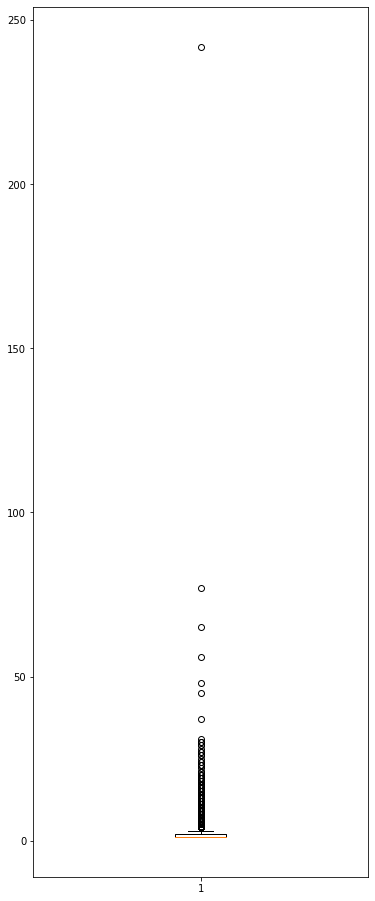

In [ ]:
plt.figure(figsize=(6,16))
plt.boxplot(adkrem['PERS_COUNT'])


Text(0, 0.5, 'Number of similar cases ')

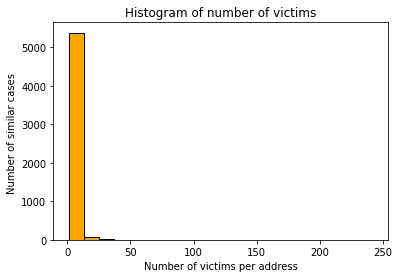

In [ ]:
plt.hist(adkrem['PERS_COUNT'], bins=20, color = 'orange', edgecolor = 'black')
plt.title('Histogram of number of victims')
plt.xlabel('Number of victims per address')
plt.ylabel('Number of similar cases ')

In [ ]:
df1 = adkrem[alladr.PERS_COUNT <= 10]
df2 = adkrem[alladr.PERS_COUNT > 10]
df2

,ADDRESS_ID,ADDRESS,APT_COUNT,PERS_COUNT,LINK,longitude,latitude,distance from Kremlin,long_kr,lat_kr
24,25,"Академика Петровского ул., д.16а",26,30,http://mos.memo.ru/shot-1.htm#s6,37.608697,55.719298,3.674865,37.617664,55.752121
60,62,"Ананьевский пер., д.4",12,14,http://mos.memo.ru/shot-1.htm#s20,37.636967,55.770963,2.447781,37.617664,55.752121
61,63,"Ананьевский пер., д.5",29,31,http://mos.memo.ru/shot-1.htm#s20,37.636428,55.771059,2.440066,37.617664,55.752121
80,82,"Анны Северьяновой ул., д.5",12,12,http://mos.memo.ru/shot-2.htm#s5,37.552939,55.757399,4.057349,37.617664,55.752121
104,106,"Арбат ул., д.35",12,12,http://mos.memo.ru/shot-2.htm#s8,37.591593,55.749288,1.622744,37.617664,55.752121
...,...,...,...,...,...,...,...,...,...,...
5247,5068,"Чистопрудный б-р, д.12 корп.2",11,11,http://mos.memo.ru/shot-72.htm#s16,37.642914,55.761619,1.938289,37.617664,55.752121
5249,5070,"Чистопрудный б-р, д.12 корп.4",17,18,http://mos.memo.ru/shot-72.htm#s16,37.642555,55.760423,1.848881,37.617664,55.752121
5317,5138,"Шмитовский пр., д.9",15,16,http://mos.memo.ru/shot-74.htm#s20,37.552858,55.757916,4.071215,37.617664,55.752121
5346,5167,"Щепкина ул., д.60",13,13,http://mos.memo.ru/shot-75.htm#s4,37.629789,55.785579,3.816668,37.617664,55.752121


Text(0, 0.5, 'Number of similar cases ')

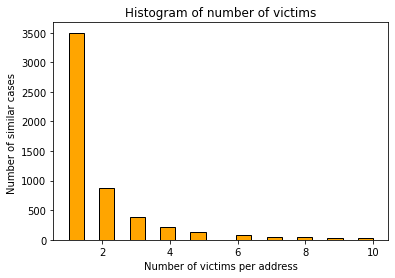

In [ ]:
plt.hist(df1['PERS_COUNT'], bins=20, color = 'orange', edgecolor = 'black')
plt.title('Histogram of number of victims')
plt.xlabel('Number of victims per address')
plt.ylabel('Number of similar cases ')

Text(0, 0.5, 'Number of similar cases ')

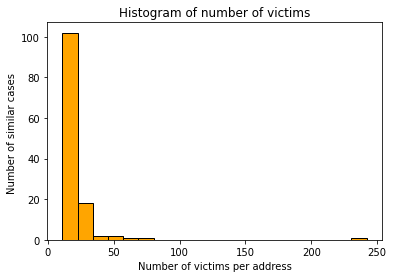

In [ ]:
plt.hist(df2['PERS_COUNT'], bins=20, color = 'orange', edgecolor = 'black')
plt.title('Histogram of number of victims')
plt.xlabel('Number of victims per address')
plt.ylabel('Number of similar cases ')

In [ ]:
adkrem[alladr.PERS_COUNT > 100]

,ADDRESS_ID,ADDRESS,APT_COUNT,PERS_COUNT,LINK,longitude,latitude,distance from Kremlin,long_kr,lat_kr
4227,4045,"Серафимовича ул., д.2",186,242,http://mos.memo.ru/shot-55.htm#s4,37.614042,55.743152,1.002909,37.617664,55.752121


<function matplotlib.pyplot.show>

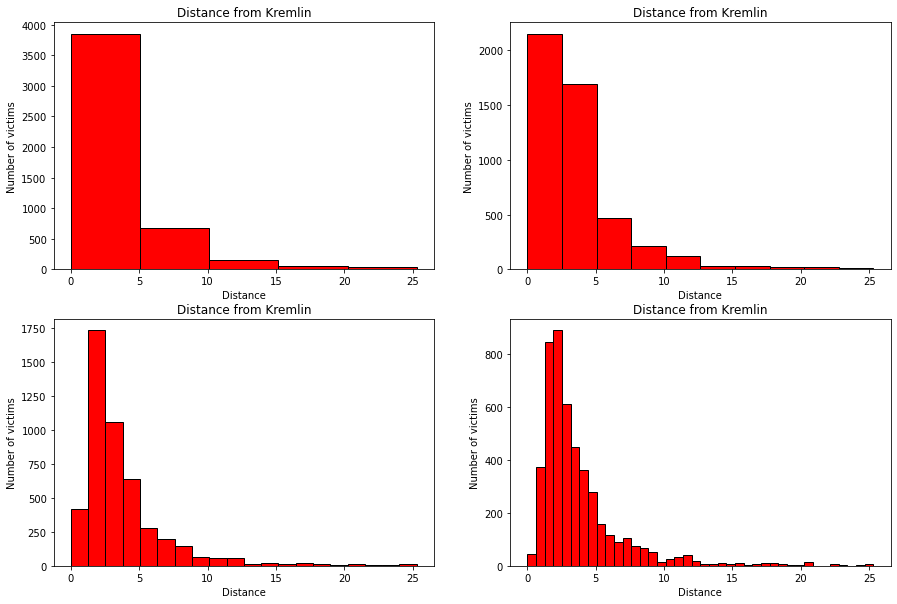

In [ ]:
bins = [5,10,20,40]
fig, axes = plt.subplots(2, 2, figsize=(15,10))

for  i, ax in zip (range(4), axes.flatten()):
  ax.hist(adkrem['distance from Kremlin'], bins[i], color = 'red', edgecolor = 'black')
  ax.set_title('Distance from Kremlin')
  ax.set(xlabel ='Distance', ylabel='Number of victims')
plt.show


<function matplotlib.pyplot.show>

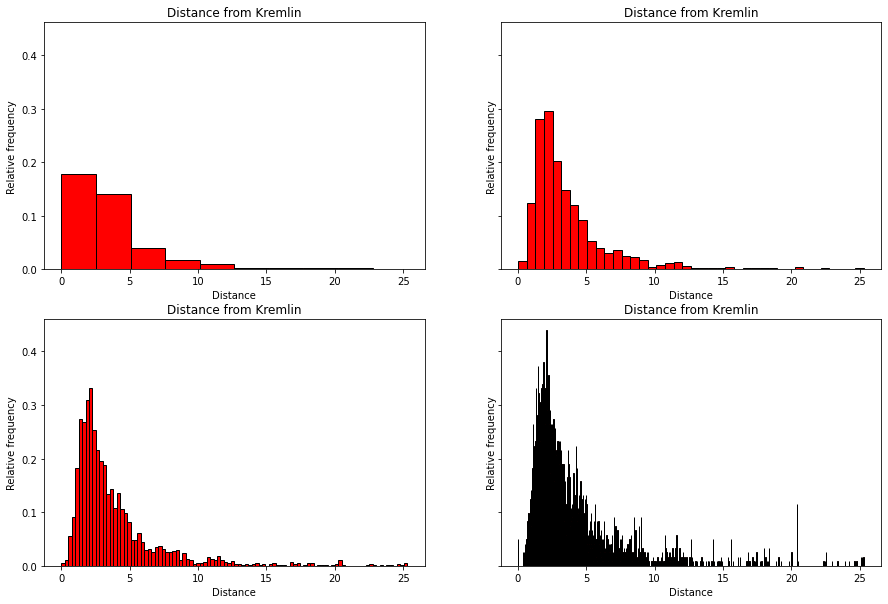

In [ ]:
bins = [10,40,100,1000]
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15,10))

for  i, ax in zip (range(4), axes.flatten()):
  ax.hist(adkrem['distance from Kremlin'], bins[i], density=True, color = 'red', edgecolor = 'black')
  ax.set_title('Distance from Kremlin')
  ax.set(xlabel ='Distance', ylabel='Relative frequency')
plt.show

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 9.9 MB/s 
     |████████████████████████████████| 6.3 MB 56.0 MB/s 
     |████████████████████████████████| 15.4 MB 38.8 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
mmr = gpd.read_file(
  "/content/mesta_massovyh_rasstrelov.shp")


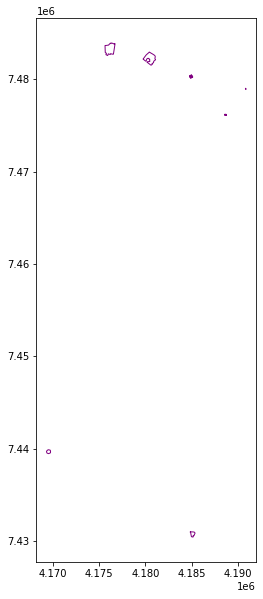

In [ ]:
mmr.plot(figsize=(10,10), edgecolor="purple", facecolor="None")


#Conclusions